In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

Encoder

In [2]:
encoded_input = keras.Input(shape=(32, 32, 3), name="image_input")
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(encoded_input)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = keras.layers.Flatten()(x)
encoder_output = keras.layers.Dense(128, activation='relu')(x)

model_encoder = keras.Model(encoded_input, encoder_output, name='model_encoder')

Decoder

In [3]:
decoder_input = keras.layers.Dense(256, activation='relu')(encoder_output)

x = keras.layers.Reshape((4, 4, 16))(decoder_input)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)

decoded = layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', padding='same')(x)

CNN AE

In [4]:
autoencoder = keras.Model(encoded_input, decoded, name='model_cnn_autoencoder')

In [5]:
autoencoder.summary()

Model: "model_cnn_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)

In [6]:
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
autoencoder.compile(optimizer=optimizer_adam, loss='mse')

In [7]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
# x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
epochs = 15

for epoch in range(epochs):
    history = autoencoder.fit(x_train, x_train, epochs=1, batch_size=128, validation_split=0.1, callbacks=[TensorBoard(log_dir='../data/autoencoder')])
    autoencoder.save(f"../models/ModelCNNAutoEncoder-{epoch+1}.model")

## epochs=100

In [9]:
# terminal command: tensorboard --logdir=./data/autoencoder

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='../data/autoencoder')])

Epoch 1/100
391/391 [==============================] - 8s 9ms/step - loss: 0.0311 - val_loss: 0.0194
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: 0.0174 - val_loss: 0.0160
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: 0.0155 - val_loss: 0.0148
Epoch 4/100
391/391 [==============================] - 3s 8ms/step - loss: 0.0146 - val_loss: 0.0141
Epoch 5/100
391/391 [==============================] - 3s 7ms/step - loss: 0.0141 - val_loss: 0.0135
Epoch 6/100
391/391 [==============================] - 3s 7ms/step - loss: 0.0135 - val_loss: 0.0132
Epoch 7/100
391/391 [==============================] - 3s 7ms/step - loss: 0.0131 - val_loss: 0.0129
Epoch 8/100
391/391 [==============================] - 3s 7ms/step - loss: 0.0128 - val_loss: 0.0128
Epoch 9/100
391/391 [==============================] - 3s 7ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 10/100
391/391 [==============================] - 3s 8ms/step - loss: 0.0122 - val_lo

## epochs=600

In [12]:
# terminal command: tensorboard --logdir=./data/autoencoder

autoencoder.fit(x_train, x_train,
                epochs=600,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='../data/autoencoder')])

Epoch 1/600
391/391 [==============================] - 3s 8ms/step - loss: 0.0082 - val_loss: 0.0084
Epoch 2/600
391/391 [==============================] - 3s 7ms/step - loss: 0.0081 - val_loss: 0.0084
Epoch 3/600
391/391 [==============================] - 3s 8ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 4/600
391/391 [==============================] - 3s 8ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 5/600
391/391 [==============================] - 3s 8ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 6/600
391/391 [==============================] - 3s 7ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 7/600
391/391 [==============================] - 3s 8ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 8/600
391/391 [==============================] - 3s 8ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 9/600
391/391 [==============================] - 3s 7ms/step - loss: 0.0081 - val_loss: 0.0084
Epoch 10/600
391/391 [==============================] - 3s 7ms/step - loss: 0.0081 - val_lo

In [15]:
autoencoder.save(f"../models/ModelCNNAutoEncoder-{600}.model")

INFO:tensorflow:Assets written to: ../models/ModelCNNAutoEncoder-600.model\assets


INFO:tensorflow:Assets written to: ../models/ModelCNNAutoEncoder-600.model\assets


313/313 [==============================] - 1s 2ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


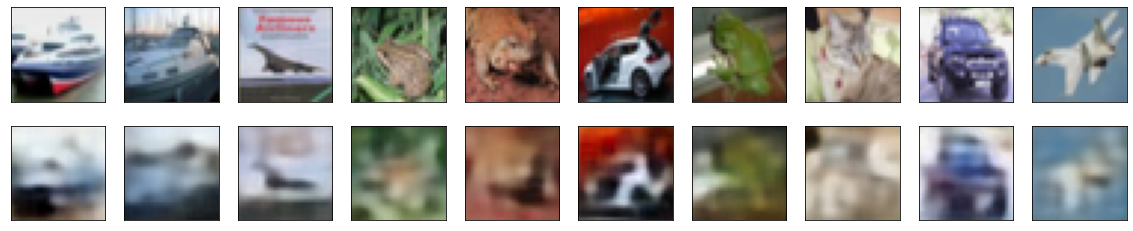

In [13]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 2ms/step


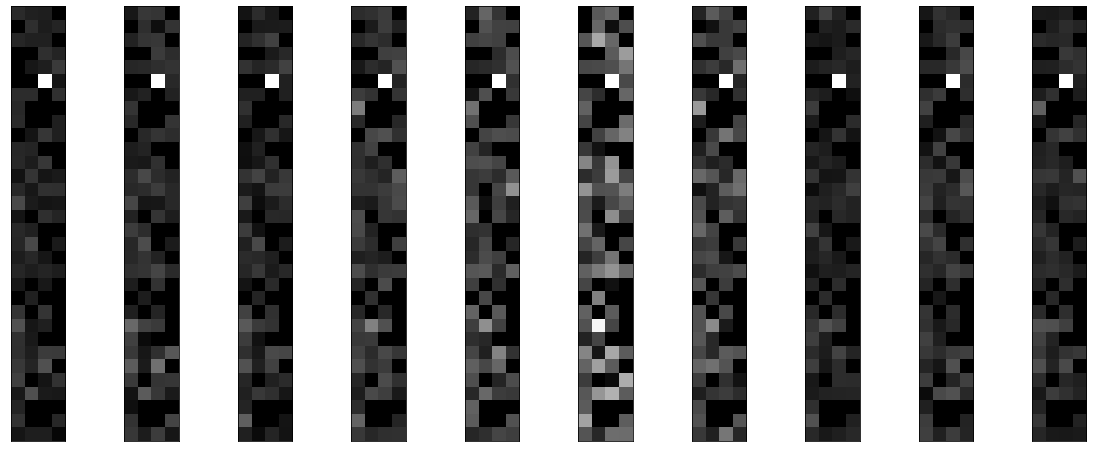

In [14]:
encoded_imgs = model_encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf

def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  # shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  # long_dim = max(shape)
  # scale = max_dim / long_dim
  #
  # new_shape = tf.cast(shape * scale, tf.int32)
  #
  # img = tf.image.resize(img, new_shape)
  # img = img[tf.newaxis, :]
  return img

path = '../data/test.png'
x = load_img(path)

plt.imshow(x)

In [33]:
test_decoded_imgs = autoencoder.predict(np.array([x]))

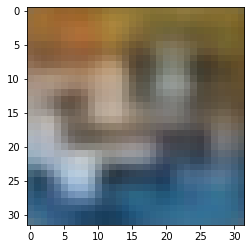

In [21]:
plt.imshow(decoded_imgs[0].reshape(32, 32, 3))